In [2]:
pip install ewtpy

  Using cached ewtpy-0.2-py2.py3-none-any.whl (8.9 kB)
Note: you may need to restart the kernel to use updated packages.


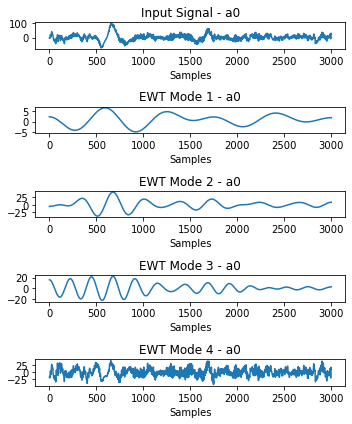

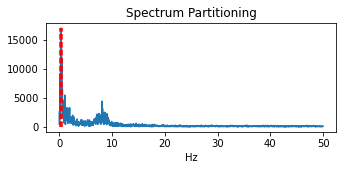

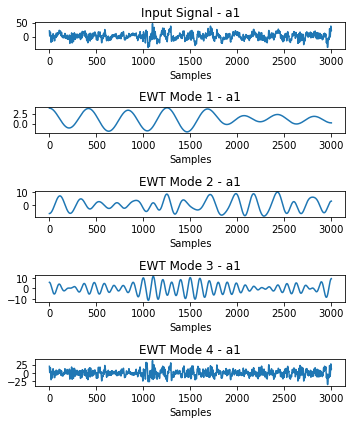

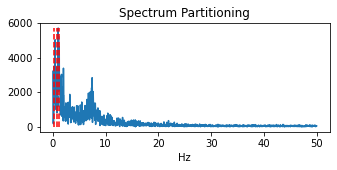

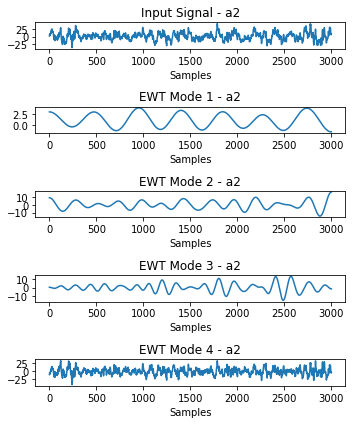

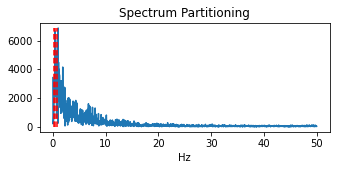

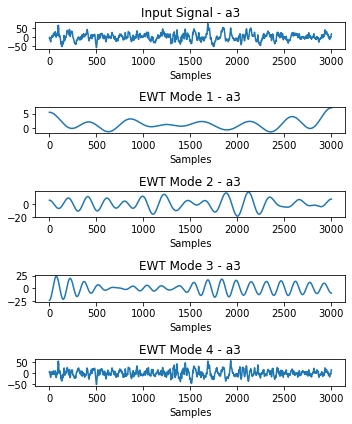

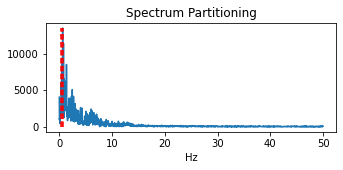

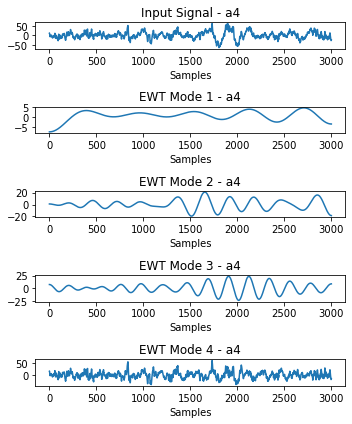

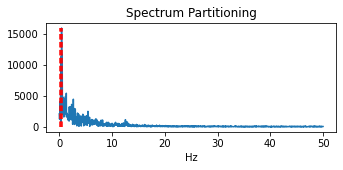

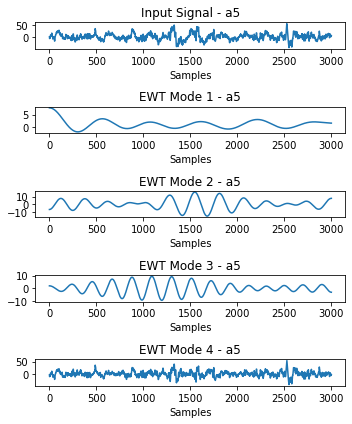

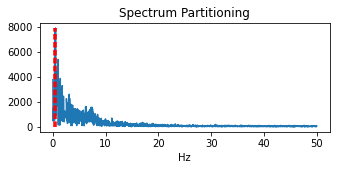

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ewtpy
from scipy.io import loadmat

# List of dataset filenames
dataset_filenames = ['a0.mat', 'a1.mat', 'a2.mat', 'a3.mat', 'a4.mat', 'a5.mat']

# Set parameters
N = 4  # number of supports
detect = "locmax"  # detection mode: locmax, locmaxmin, locmaxminf
reg = 'gaussian'  # spectrum regularization - it is smoothed with an average (or gaussian) filter
lengthFilter = 25  # length or average or gaussian filter
sigmaFilter = 0  # sigma of gaussian filter
Fs = 100  # sampling frequency, in Hz (if unknown, set -1)

# Iterate over each dataset
for dataset_filename in dataset_filenames:
    # Load EEG data from the MATLAB file
    mat_data = loadmat(dataset_filename)
    eeg_data = mat_data[f'{dataset_filename[:-4]}0001']  # Assuming variable names follow a pattern

    # Convert the data to a NumPy array and flatten it
    signal = eeg_data.astype(float).flatten()

    # Perform EWT for the selected channel
    ewt, _, boundaries = ewtpy.EWT1D(signal,
                                     N=N,
                                     log=0,
                                     detect=detect,
                                     completion=0,
                                     reg=reg,
                                     lengthFilter=lengthFilter,
                                     sigmaFilter=sigmaFilter)

    # Plot input signal
    plt.figure(figsize=(5, 6))
    plt.subplot(len(ewt.T) + 1, 1, 1)
    plt.plot(signal)
    plt.title(f'Input Signal - {dataset_filename[:-4]}')
    plt.xlabel('Samples')

    # Plot each EWT mode in a separate subplot
    for i, mode in enumerate(ewt.T):
        plt.subplot(len(ewt.T) + 1, 1, i + 2)
        plt.plot(mode)
        plt.title(f'EWT Mode {i + 1} - {dataset_filename[:-4]}')
        plt.xlabel('Samples')

    plt.tight_layout()
    plt.savefig(f'{dataset_filename[:-4]}_EWT.png')
    plt.show()

    # Show boundaries on the spectrum
    plt.figure(figsize=(5.2, 2))
    ff = np.fft.fft(signal)
    freq = 2 * np.pi * np.arange(0, len(ff)) / len(ff)

    if Fs != -1:
        freq = freq * Fs / (2 * np.pi)
        boundariesPLT = boundaries * Fs / (2 * np.pi)
    else:
        boundariesPLT = boundaries

    ff = np.abs(ff[: ff.size // 2])  # one-sided magnitude
    freq = freq[: freq.size // 2]

    plt.plot(freq, ff)
    for bb in boundariesPLT:
        plt.plot([bb, bb], [0, max(ff)], 'r--')
    plt.title('Spectrum Partitioning')
    plt.xlabel('Hz')

    plt.savefig(f'sp_{dataset_filename[:-4]}_EWT.png')
    plt.show()


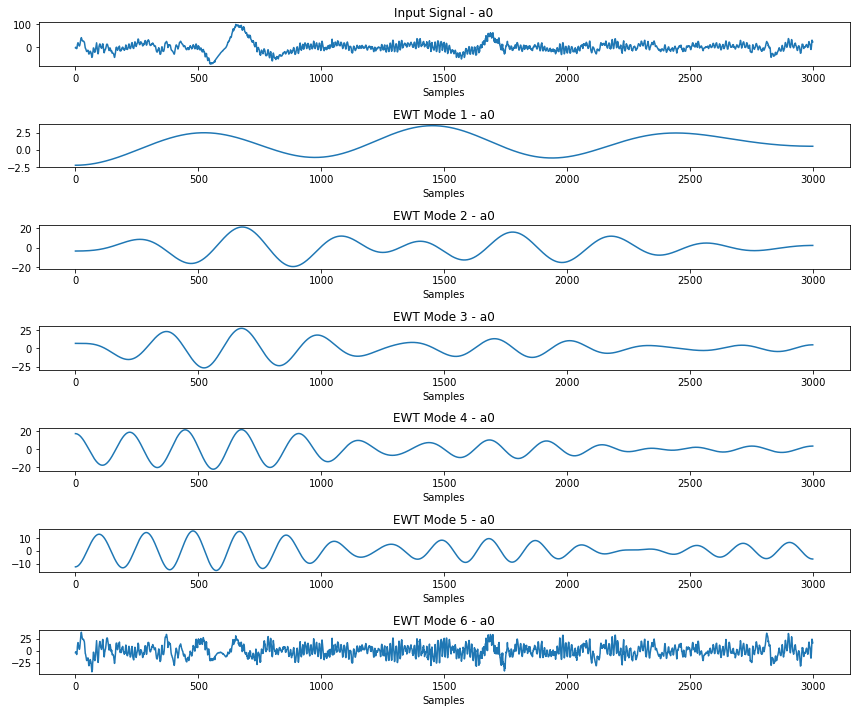

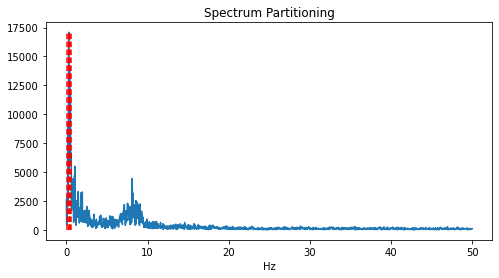

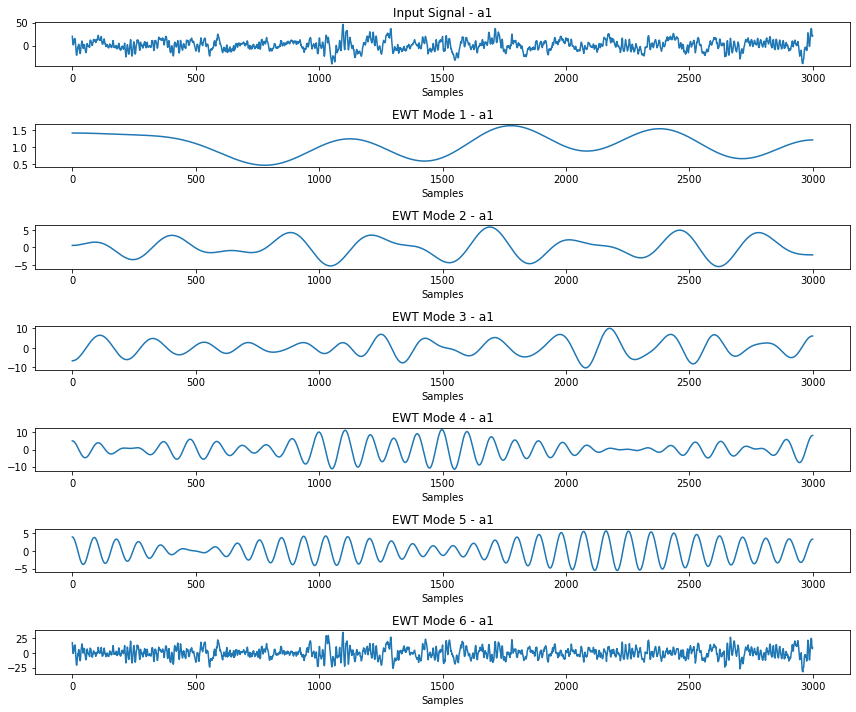

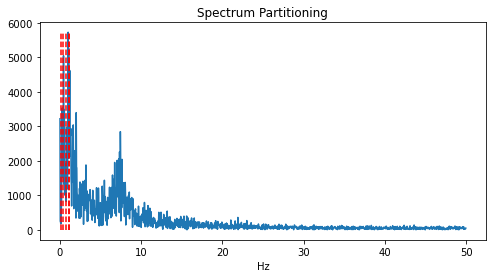

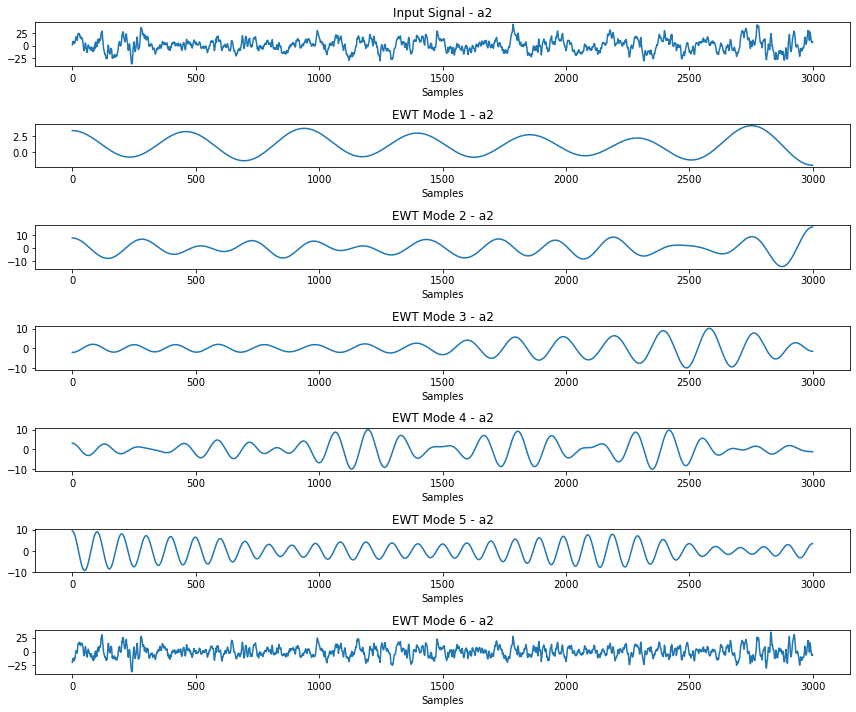

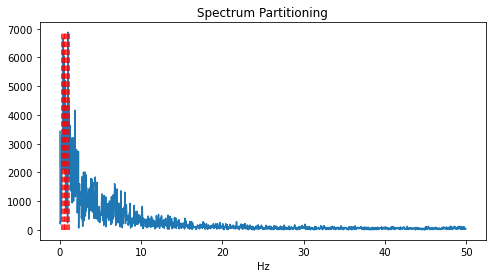

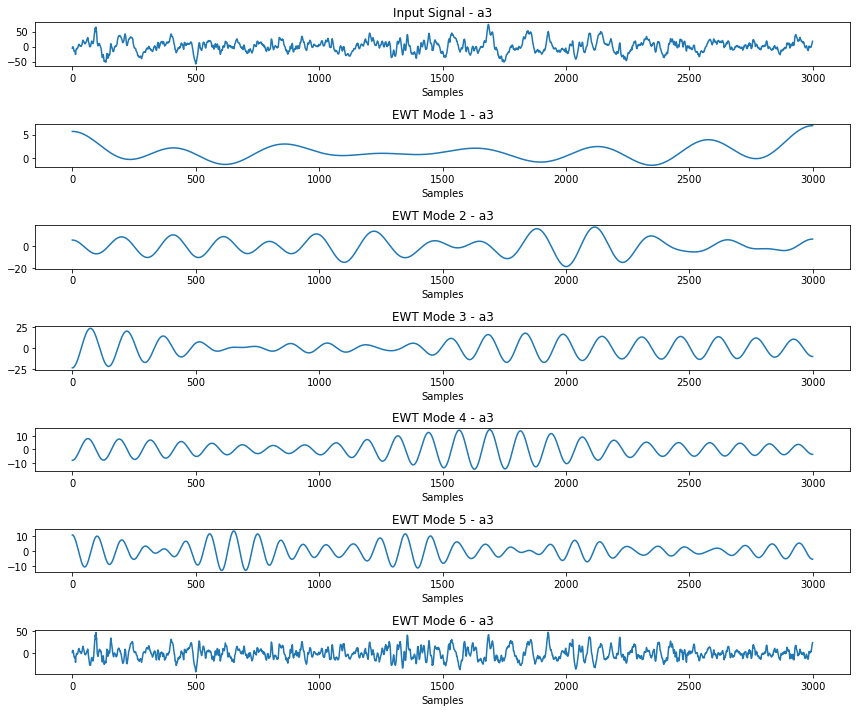

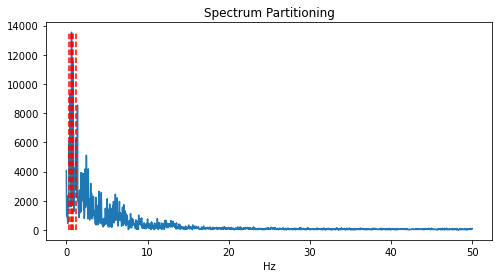

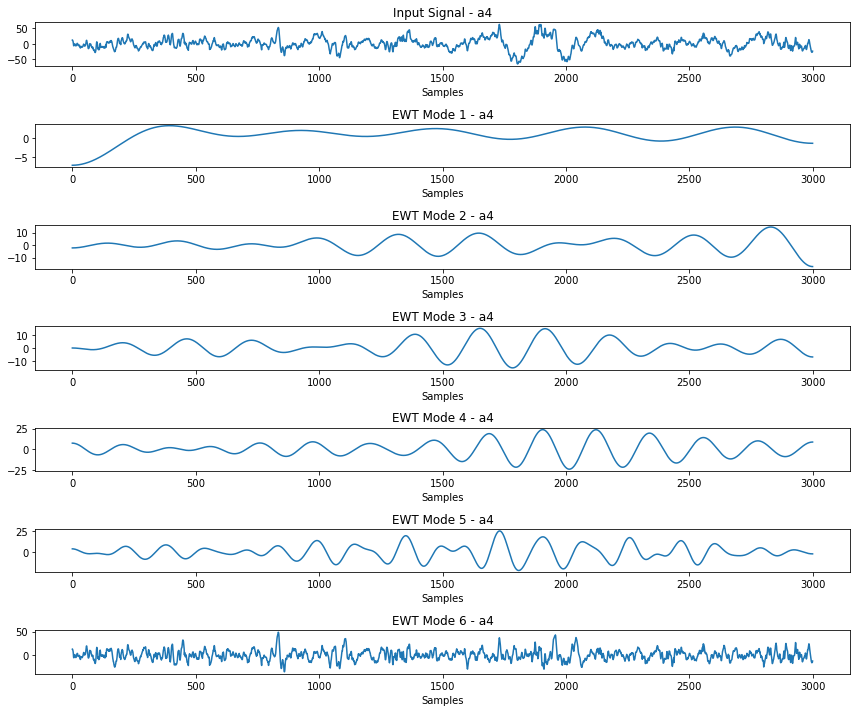

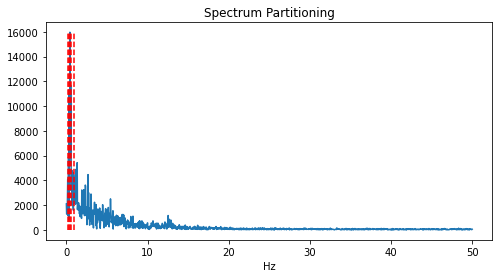

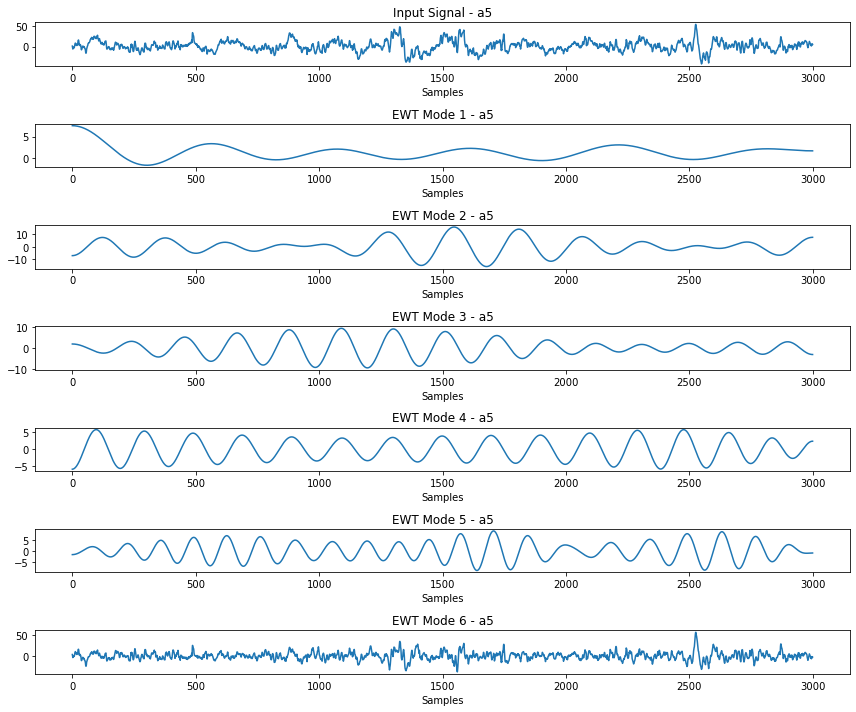

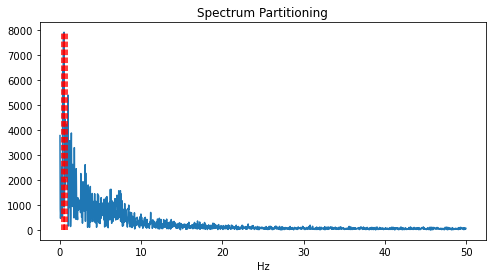

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ewtpy
from scipy.io import loadmat

# List of dataset filenames
dataset_filenames = ['a0.mat', 'a1.mat', 'a2.mat', 'a3.mat', 'a4.mat', 'a5.mat']

# Set parameters
N = 6  # number of supports
detect = "locmax"  # detection mode: locmax, locmaxmin, locmaxminf
reg = 'gaussian'  # spectrum regularization - it is smoothed with an average (or gaussian) filter
lengthFilter = 25  # length or average or gaussian filter
sigmaFilter = 0  # sigma of gaussian filter
Fs = 100  # sampling frequency, in Hz (if unknown, set -1)

# Iterate over each dataset
for dataset_filename in dataset_filenames:
    # Load EEG data from the MATLAB file
    mat_data = loadmat(dataset_filename)
    eeg_data = mat_data[f'{dataset_filename[:-4]}0001']  # Assuming variable names follow a pattern

    # Convert the data to a NumPy array and flatten it
    signal = eeg_data.astype(float).flatten()

    # Perform EWT for the selected channel
    ewt, _, boundaries = ewtpy.EWT1D(signal,
                                     N=N,
                                     log=0,
                                     detect=detect,
                                     completion=0,
                                     reg=reg,
                                     lengthFilter=lengthFilter,
                                     sigmaFilter=sigmaFilter)

    # Plot input signal
    plt.figure(figsize=(12, 10))
    plt.subplot(N + 1, 1, 1)
    plt.plot(signal)
    plt.title(f'Input Signal - {dataset_filename[:-4]}')
    plt.xlabel('Samples')

    # Plot each EWT mode in a separate subplot
    for i, mode in enumerate(ewt.T):
        plt.subplot(N + 1, 1, i + 2)
        plt.plot(mode)
        plt.title(f'EWT Mode {i + 1} - {dataset_filename[:-4]}')
        plt.xlabel('Samples')

    plt.tight_layout()
    plt.savefig(f'{dataset_filename[:-4]}_EWT.png')
    plt.show()

    # Show boundaries on the spectrum
    plt.figure(figsize=(8, 4))
    ff = np.fft.fft(signal)
    freq = 2 * np.pi * np.arange(0, len(ff)) / len(ff)

    if Fs != -1:
        freq = freq * Fs / (2 * np.pi)
        boundariesPLT = boundaries * Fs / (2 * np.pi)
    else:
        boundariesPLT = boundaries

    ff = np.abs(ff[: ff.size // 2])  # one-sided magnitude
    freq = freq[: freq.size // 2]

    plt.plot(freq, ff)
    for bb in boundariesPLT:
        plt.plot([bb, bb], [0, max(ff)], 'r--')
    plt.title('Spectrum Partitioning')
    plt.xlabel('Hz')

    plt.savefig(f'sp_{dataset_filename[:-4]}_EWT.png')
    plt.show()


In [23]:
import numpy as np
import ewtpy
from scipy.io import loadmat
import pandas as pd

# List of dataset filenames
dataset_filenames = ['a0.mat', 'a1.mat', 'a2.mat', 'a3.mat', 'a4.mat', 'a5.mat']

# Set parameters
N = 6  # number of supports
detect = "locmax"  # detection mode: locmax, locmaxmin, locmaxminf
reg = 'gaussian'  # spectrum regularization - it is smoothed with an average (or gaussian) filter
lengthFilter = 25  # length or average or gaussian filter
sigmaFilter = 0  # sigma of gaussian filter
Fs = 100  # default sampling frequency, in Hz (if unknown, set -1)

# Function to calculate the specified features from mode 6
def calculate_mode_features(mode, Fs):
    SE = -np.sum((np.abs(mode) ** 2) * np.log(np.abs(mode) ** 2))  # Spectral Entropy
    SEt = np.sum(np.abs(mode) ** 2)  # Spectral Energy
    HM = np.sqrt(np.mean(np.diff(mode) ** 2))  # Hjorth Mobility
    HC = np.sqrt(np.mean(np.diff(np.diff(mode)) ** 2)) / HM  # Hjorth Complexity
    SP = np.max(mode) - np.min(mode)  # Spectral Peak
    return {'SE': SE, 'SEt': SEt, 'HM': HM, 'HC': HC, 'SP': SP}

# Initialize an empty list to store feature DataFrames
feature_dfs = []

# Iterate over each dataset
for dataset_filename in dataset_filenames:
    # Load EEG data from the MATLAB file
    mat_data = loadmat(dataset_filename)
    
    # Extract class label from the filename
    class_label = int(dataset_filename[1])  # Assuming the class label is the second character of the filename
    
    # Iterate over each segment in the dataset
    for key, segment_data in mat_data.items():
        # Skip if the key is '__header__', '__version__', or '__globals__'
        if key.startswith('__'):
            continue
        
        # Convert the data to a NumPy array and flatten it
        signal = segment_data.flatten().astype(float)
        
        # Perform EWT for the selected channel
        ewt, _, _ = ewtpy.EWT1D(signal, N=N, log=0, detect=detect, completion=0, reg=reg, lengthFilter=lengthFilter, sigmaFilter=sigmaFilter)

        # Select mode 6 if it exists, otherwise select the last mode
        if len(ewt.T) >= 7:
            mode_selected = ewt.T[5]  # Mode 6 is at index 5 (0-indexed)
        else:
            mode_selected = ewt.T[-1]  # Select the last mode
            
        # Calculate features for the selected mode
        mode_features = calculate_mode_features(mode_selected, Fs)
        
        # Add additional information to the features dictionary
        mode_features['segment_index'] = int(key[-4:])  # Extract segment index from the key
        mode_features['class_label'] = class_label
        
        # Append the features DataFrame to the list
        feature_dfs.append(pd.DataFrame([mode_features]))

# Concatenate all feature DataFrames into a single DataFrame
features_df = pd.concat(feature_dfs, ignore_index=True)

# Save the features DataFrame to a CSV file
features_df.to_csv('mode_6_features.csv', index=False)


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the extracted features from the CSV file
features_df = pd.read_csv('mode_6_features.csv')

# Split features and labels
X = features_df.drop(['class_label', 'segment_index'], axis=1)  # Features
y = features_df['class_label']  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
rf_classifier = RandomForestClassifier()
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()

# Train the classifiers
rf_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)

# Predict using the trained classifiers
rf_predictions = rf_classifier.predict(X_test)
svm_predictions = svm_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)

# Calculate accuracies
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Print accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("k-Nearest Neighbors Accuracy:", knn_accuracy)


Random Forest Accuracy: 0.6978723404255319
Support Vector Machine Accuracy: 0.4978723404255319
k-Nearest Neighbors Accuracy: 0.5148936170212766


In [14]:
import numpy as np
import ewtpy
from scipy.io import loadmat
import pandas as pd

# List of dataset filenames
dataset_filenames = ['a0.mat', 'a1.mat', 'a2.mat', 'a3.mat', 'a4.mat', 'a5.mat']

# Set parameters
N = 6  # number of supports
detect = "locmax"  # detection mode: locmax, locmaxmin, locmaxminf
reg = 'gaussian'  # spectrum regularization - it is smoothed with an average (or gaussian) filter
lengthFilter = 25  # length or average or gaussian filter
sigmaFilter = 0  # sigma of gaussian filter
Fs = 100  # default sampling frequency, in Hz (if unknown, set -1)

# Function to calculate the specified features for a given mode
def calculate_mode_features(mode, Fs):
    SE = -np.sum((np.abs(mode) ** 2) * np.log(np.abs(mode) ** 2))  # Spectral Entropy
    SEt = np.sum(np.abs(mode) ** 2)  # Spectral Energy
    HM = np.sqrt(np.mean(np.diff(mode) ** 2))  # Hjorth Mobility
    HC = np.sqrt(np.mean(np.diff(np.diff(mode)) ** 2)) / HM  # Hjorth Complexity
    SP = np.max(mode) - np.min(mode)  # Spectral Peak
    return {'SE': SE, 'SEt': SEt, 'HM': HM, 'HC': HC, 'SP': SP}

# Initialize an empty list to store feature DataFrames
feature_dfs = []

# Iterate over each dataset
for dataset_filename in dataset_filenames:
    # Load EEG data from the MATLAB file
    mat_data = loadmat(dataset_filename)
    
    # Extract class label from the filename
    class_label = int(dataset_filename[1])  # Assuming the class label is the second character of the filename
    
    # Iterate over each segment in the dataset
    for key, segment_data in mat_data.items():
        # Skip if the key is '__header__', '__version__', or '__globals__'
        if key.startswith('__'):
            continue
        
        # Convert the data to a NumPy array and flatten it
        signal = segment_data.flatten().astype(float)
        
        # Perform EWT for the selected channel
        ewt, _, _ = ewtpy.EWT1D(signal, N=N, log=0, detect=detect, completion=0, reg=reg, lengthFilter=lengthFilter, sigmaFilter=sigmaFilter)
        
        # Calculate features for each mode
        for i, mode in enumerate(ewt.T):
            mode_features = calculate_mode_features(mode, Fs)
            
            # Add additional information to the features dictionary
            mode_features['segment_index'] = int(key[-4:])  # Extract segment index from the key
            mode_features['class_label'] = class_label
            mode_features['mode_index'] = i + 1  # Mode index starts from 1
            
            # Append the features DataFrame to the list
            feature_dfs.append(pd.DataFrame([mode_features]))

# Concatenate all feature DataFrames into a single DataFrame
features_df = pd.concat(feature_dfs, ignore_index=True)

# Save the features DataFrame to a CSV file
features_df.to_csv('all_modes_features.csv', index=False)


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the extracted features from the CSV file
features_df = pd.read_csv('all_modes_features.csv')

# Split features and labels
X = features_df.drop(['class_label', 'segment_index', 'mode_index'], axis=1)  # Features
y = features_df['class_label']  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
rf_classifier = RandomForestClassifier()
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()

# Train the classifiers
rf_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)

# Predict using the trained classifiers
rf_predictions = rf_classifier.predict(X_test)
svm_predictions = svm_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)

# Calculate accuracies
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Print accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("k-Nearest Neighbors Accuracy:", knn_accuracy)


Random Forest Accuracy: 0.5572898190847818
Support Vector Machine Accuracy: 0.49787158566867684
k-Nearest Neighbors Accuracy: 0.4512238382405108


In [20]:
import numpy as np
import ewtpy
from scipy.io import loadmat
import pandas as pd

# List of dataset filenames
dataset_filenames = ['a0.mat', 'a1.mat', 'a2.mat', 'a3.mat', 'a4.mat', 'a5.mat']

# Set parameters
N = 6  # number of supports
detect = "locmax"  # detection mode: locmax, locmaxmin, locmaxminf
reg = 'gaussian'  # spectrum regularization - it is smoothed with an average (or gaussian) filter
lengthFilter = 25  # length or average or gaussian filter
sigmaFilter = 0  # sigma of gaussian filter
Fs = 100  # default sampling frequency, in Hz (if unknown, set -1)

# Function to calculate the specified features for a given mode
def calculate_mode_features(mode, Fs):
    SE = -np.sum((np.abs(mode) ** 2) * np.log(np.abs(mode) ** 2))  # Spectral Entropy
    SEt = np.sum(np.abs(mode) ** 2)  # Spectral Energy
    HM = np.sqrt(np.mean(np.diff(mode) ** 2))  # Hjorth Mobility
    HC = np.sqrt(np.mean(np.diff(np.diff(mode)) ** 2)) / HM  # Hjorth Complexity
    SP = np.max(mode) - np.min(mode)  # Spectral Peak
    return {'SE': SE, 'SEt': SEt, 'HM': HM, 'HC': HC, 'SP': SP}

# Initialize an empty list to store feature DataFrames
feature_dfs = []

# Iterate over each dataset
for dataset_filename in dataset_filenames:
    # Load EEG data from the MATLAB file
    mat_data = loadmat(dataset_filename)
    
    # Extract class label from the filename
    class_label = int(dataset_filename[1])  # Assuming the class label is the second character of the filename
    
    # Iterate over each segment in the dataset
    for key, segment_data in mat_data.items():
        # Skip if the key is '__header__', '__version__', or '__globals__'
        if key.startswith('__'):
            continue
        
        # Convert the data to a NumPy array and flatten it
        signal = segment_data.flatten().astype(float)
        
        # Perform EWT for the selected channel
        ewt, _, _ = ewtpy.EWT1D(signal, N=N, log=0, detect=detect, completion=0, reg=reg, lengthFilter=lengthFilter, sigmaFilter=sigmaFilter)
        
        # Select mode 5 if it exists, otherwise skip this segment
        if len(ewt.T) >= 3:
            mode_selected = ewt.T[4]  # Mode 5 is at index 4 (0-indexed)
        else:
            continue
            
        # Calculate features for mode 5
        mode_features = calculate_mode_features(mode_selected, Fs)
        
        # Add additional information to the features dictionary
        mode_features['segment_index'] = int(key[-4:])  # Extract segment index from the key
        mode_features['class_label'] = class_label
        
        # Append the features DataFrame to the list
        feature_dfs.append(pd.DataFrame([mode_features]))

# Concatenate all feature DataFrames into a single DataFrame
features_df = pd.concat(feature_dfs, ignore_index=True)

# Save the features DataFrame to a CSV file
features_df.to_csv('mode_3_features.csv', index=False)


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the extracted features from the CSV file
features_df = pd.read_csv('mode_3_features.csv')

# Split features and labels
X = features_df.drop(['class_label', 'segment_index'], axis=1)  # Features
y = features_df['class_label']  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
rf_classifier = RandomForestClassifier()
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()

# Train the classifiers
rf_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)

# Predict using the trained classifiers
rf_predictions = rf_classifier.predict(X_test)
svm_predictions = svm_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)

# Calculate accuracies
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Print accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("k-Nearest Neighbors Accuracy:", knn_accuracy)


Random Forest Accuracy: 0.5553191489361702
Support Vector Machine Accuracy: 0.5
k-Nearest Neighbors Accuracy: 0.46914893617021275


In [1]:
import numpy as np
import ewtpy
from scipy.io import loadmat
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# List of dataset filenames
dataset_filenames = ['a0.mat', 'a1.mat', 'a2.mat', 'a3.mat', 'a4.mat', 'a5.mat']

# Set parameters
N = 6  # number of supports
detect = "locmax"  # detection mode: locmax, locmaxmin, locmaxminf
reg = 'gaussian'  # spectrum regularization - it is smoothed with an average (or gaussian) filter
lengthFilter = 25  # length or average or gaussian filter
sigmaFilter = 0  # sigma of gaussian filter
Fs = 100  # default sampling frequency, in Hz (if unknown, set -1)

# Function to calculate the specified features from mode 6
def calculate_mode_features(mode, Fs):
    SE = -np.sum((np.abs(mode) ** 2) * np.log(np.abs(mode) ** 2))  # Spectral Entropy
    SEt = np.sum(np.abs(mode) ** 2)  # Spectral Energy
    HM = np.sqrt(np.mean(np.diff(mode) ** 2))  # Hjorth Mobility
    HC = np.sqrt(np.mean(np.diff(np.diff(mode)) ** 2)) / HM  # Hjorth Complexity
    SP = np.max(mode) - np.min(mode)  # Spectral Peak
    return [SE, SEt, HM, HC, SP]

# Initialize lists to store features and labels
X = []
y = []

# Iterate over each dataset
for dataset_filename in dataset_filenames:
    # Load EEG data from the MATLAB file
    mat_data = loadmat(dataset_filename)
    
    # Extract class label from the filename
    class_label = int(dataset_filename[1])  # Assuming the class label is the second character of the filename
    
    # Iterate over each segment in the dataset
    for key, segment_data in mat_data.items():
        # Skip if the key is '__header__', '__version__', or '__globals__'
        if key.startswith('__'):
            continue
        
        # Convert the data to a NumPy array and flatten it
        signal = segment_data.flatten().astype(float)
        
        # Perform EWT for the selected channel
        ewt, _, _ = ewtpy.EWT1D(signal, N=N, log=0, detect=detect, completion=0, reg=reg, lengthFilter=lengthFilter, sigmaFilter=sigmaFilter)

        # Select mode 6 if it exists, otherwise select the last mode
        if len(ewt.T) >= 7:
            mode_selected = ewt.T[5]  # Mode 6 is at index 5 (0-indexed)
        else:
            mode_selected = ewt.T[-1]  # Select the last mode
            
        # Calculate features for the selected mode
        mode_features = calculate_mode_features(mode_selected, Fs)
        
        # Append features and labels to lists
        X.append(mode_features)
        y.append(class_label)

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6914893617021277


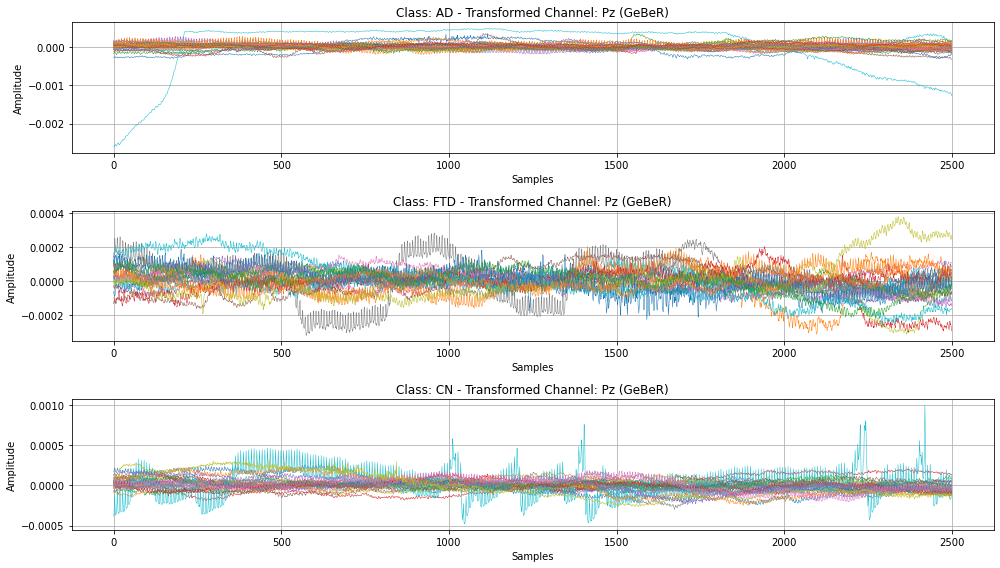

In [1]:
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# Define the directory where the EEG data (.set files) is stored
data_directory = "Alzheimer"

# Define the classes and number of subjects in each class
classes = {'AD': 36, 'FTD': 23, 'CN': 29}

# Sampling rate
sampling_rate = 500  # Assuming a sampling rate of 500 Hz

# Duration of the segment in seconds
segment_duration = 5

# Number of samples in the segment
segment_samples = sampling_rate * segment_duration

# Create a new figure
fig, axs = plt.subplots(len(classes), 1, figsize=(14, 8))  # Adjust figure size as needed

# Channel selection parameters
selected_channel = "Pz"

# Iterate over each class
for i, (class_name, num_subjects) in enumerate(classes.items()):
    class_data = []
    
    # Iterate over subjects in the class
    for j in range(1, num_subjects + 1):
        # Load EEG data from .set file
        file_path = os.path.join(data_directory, f"{class_name}/sub-{j:03d}.set")
        raw = mne.io.read_raw_eeglab(file_path, preload=True, verbose=False)
        # Get EEG data
        data, _ = raw[:, :]  
        
        # Select the 5-second segment (2500 samples)
        start_sample = 0  # Start from the beginning
        end_sample = start_sample + segment_samples
        segment_data = data[0, start_sample:end_sample]
        
        class_data.append(segment_data)
    
    # Convert the list of segments to a numpy array
    class_data = np.array(class_data)
    
    # Apply Generalized Baseline Estimation and Removal (GeBeR) transform to the selected channel
    baseline_removed_data = class_data - np.mean(class_data, axis=1, keepdims=True)  # Subtract mean baseline
    
    # Plot the transformed data for the selected channel
    axs[i].plot(baseline_removed_data.T, linewidth=0.5)  # Transpose for plotting
    axs[i].set_title(f"Class: {class_name} - Transformed Channel: {selected_channel} (GeBeR)")
    axs[i].set_xlabel("Samples")
    axs[i].set_ylabel("Amplitude")
    axs[i].grid(True)

# Adjust layout
plt.tight_layout()

# Save the figure as PNG with high quality
plt.savefig("GeBeR_transform_Pz_channel_5_sec.png", dpi=300)

# Show the result
plt.show()


In [1]:
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from PyEMD import EMD
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Define the directory where the EEG data (.set files) is stored
data_directory = "Alzheimer"

# Define the classes and number of subjects in each class
classes = {'AD': 36, 'FTD': 23, 'CN': 29}

# Sampling rate
sampling_rate = 500  # Assuming a sampling rate of 500 Hz

# Duration of the segment in seconds
segment_duration = 5

# Number of samples in the segment
segment_samples = sampling_rate * segment_duration

# Initialize lists to store features and labels
X_features = []
y_labels = []

# Channel selection parameters
selected_channel = "Pz"

# Iterate over each class
for class_name, num_subjects in classes.items():
    class_data = []
    
    # Iterate over subjects in the class
    for j in range(1, num_subjects + 1):
        # Load EEG data from .set file
        file_path = os.path.join(data_directory, f"{class_name}/sub-{j:03d}.set")
        raw = mne.io.read_raw_eeglab(file_path, preload=True, verbose=False)
        # Get EEG data
        data, _ = raw[:, :]  
        
        # Select the 5-second segment (2500 samples)
        start_sample = 0  # Start from the beginning
        end_sample = start_sample + segment_samples
        segment_data = data[0, start_sample:end_sample]
        
        # Apply Empirical Mode Decomposition (EMD)
        emd = EMD()
        imfs = emd(segment_data)
        
        # Extract features from IMFs
        features = np.mean(imfs, axis=1)  # Example: Using mean value of IMFs as features
        
        # Append features and labels to the lists
        X_features.append(features)
        y_labels.extend([class_name] * num_subjects)

# Convert lists to numpy arrays
X_features = np.array(X_features)
y_labels = np.array(y_labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train classifier
classifier.fit(X_train_scaled, y_train)

# Predictions
predictions = classifier.predict(X_test_scaled)

# Evaluate classifier
accuracy = accuracy_score(y_test, predictions)
print("Accuracy with EMD:", accuracy)


ModuleNotFoundError: No module named 'PyEMD'

In [7]:
pip install EMD-signal


   ---------------------------------------- 74.6/74.6 kB 95.7 kB/s eta 0:00:00
   ---------------------------------------- 82.1/82.1 kB 48.4 kB/s eta 0:00:00
   --------------------------------------- 116.3/116.3 kB 36.7 kB/s eta 0:00:00
   --------------------------------------- 133.4/133.4 kB 60.2 kB/s eta 0:00:00
   ---------------------------------------- 56.8/56.8 kB 212.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
from EMD.sift import EMD

# Now you can use the EMD object for Empirical Mode Decomposition


ModuleNotFoundError: No module named 'EMD'

In [4]:
pip show EMD-signal


Name: EMD-signal
Version: 1.6.0
Summary: Implementation of the Empirical Mode Decomposition (EMD) and its variations
Home-page: https://github.com/laszukdawid/PyEMD
Author: Dawid Laszuk
Author-email: pyemd@dawid.lasz.uk
License: Apache-2.0
Location: c:\users\rajveer\anaconda3\lib\site-packages
Requires: numpy, pathos, scipy, tqdm
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [7]:
!pip install EMD-signal --upgrade --force-reinstall



  Using cached EMD_signal-1.6.0-py3-none-any.whl.metadata (8.4 kB)
  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl.metadata (61 kB)
  Using cached scipy-1.13.0-cp39-cp39-win_amd64.whl.metadata (60 kB)
  Using cached pathos-0.3.2-py3-none-any.whl.metadata (11 kB)
     ---------------------------------------- 57.6/57.6 kB 3.2 MB/s eta 0:00:00
  Using cached ppft-1.7.6.8-py3-none-any.whl.metadata (12 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached pox-0.3.4-py3-none-any.whl.metadata (8.0 kB)
  Using cached multiprocess-0.70.16-py39-none-any.whl.metadata (7.2 kB)
Using cached EMD_signal-1.6.0-py3-none-any.whl (74 kB)
Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)
Using cached pathos-0.3.2-py3-none-any.whl (82 kB)
Using cached scipy-1.13.0-cp39-cp39-win_amd64.whl (46.2 MB)
   ---------------------------------------- 78.3/78.3 kB 272.2 kB/s eta 0:00:00
Using cached dill-0.3.8-py3-none-any.whl (116 kB)
Using cached multiprocess-0.70.16-py39-none

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.4 which is incompatible.


In [5]:
!pip install EMD-signal



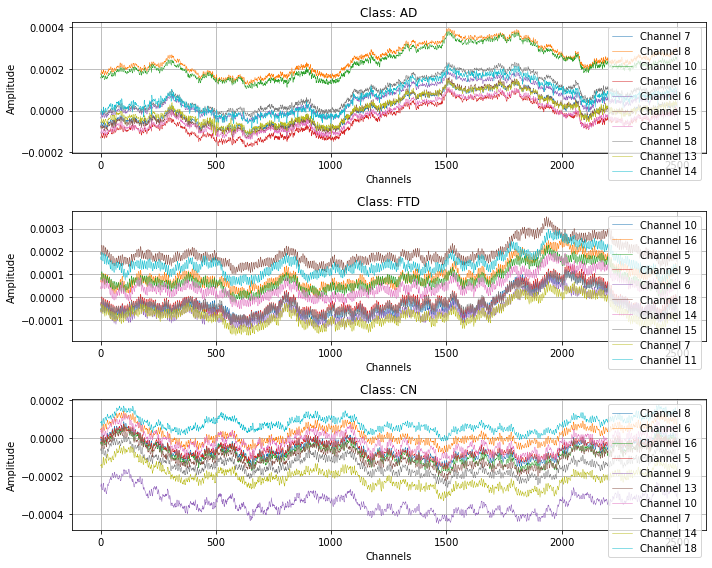

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Define the directory where the segmented data is stored
data_directory = "Alzheimer/SegmentedData"

# Define the classes
classes = ['AD', 'FTD', 'CN']

# Create a new figure
fig, axs = plt.subplots(len(classes), 1, figsize=(10, 8))  # Adjust figure size as needed

# Channel selection parameters
top_channels = 10  # Number of top channels to select

# Iterate over each class
for i, class_name in enumerate(classes):
    class_directory = os.path.join(data_directory, class_name)
    segment_files = [file for file in os.listdir(class_directory) if os.path.isfile(os.path.join(class_directory, file))]  # Get all segment files
    
    # Select the first segment file for visualization
    segment_file = segment_files[0]
    segment_data = np.load(os.path.join(class_directory, segment_file))
    
    # Transpose the segment data to match the correct dimensions
    segment_data = segment_data.T
    
    # Split features and class labels
    features = segment_data[:, :-1]  # Features
    class_labels = segment_data[:, -1]  # Class labels
    
    # Calculate feature importance based on correlation
    correlations = np.abs(np.corrcoef(features.T, class_labels))[:-1, -1]  # Calculate correlation coefficients between features and class labels
    
    # Select the top channels based on correlation
    top_channels_indices = np.argsort(correlations)[::-1][:top_channels]  # Select top channels with highest correlation
    
    # Select the top channels data
    selected_segment_data = segment_data[:, top_channels_indices]
    
    # Plot the data
    for j in range(selected_segment_data.shape[1]):  # Iterate over selected channels
        axs[i].plot(selected_segment_data[:, j], label=f"Channel {top_channels_indices[j]+1}", linewidth=0.5)  # Adjust the linewidth as needed
    axs[i].set_title(f"Class: {class_name}")
    axs[i].set_xlabel("Channels")
    axs[i].set_ylabel("Amplitude")
    axs[i].legend(loc="upper right")
    axs[i].grid(True)

# Adjust layout
plt.tight_layout()

# Save the figure as PNG with high quality
plt.savefig("segment_data_channel_selection.png", dpi=300)

# Show the result
plt.show()


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Define the directory where the segmented data is stored
data_directory = "Alzheimer/SegmentedData"

# Define the classes
classes = ['AD', 'FTD', 'CN']

# Channel selection parameters
top_channels = 10  # Number of top channels to select

# Dictionary to store channel data for each class
class_channel_data = {class_name: [] for class_name in classes}

# Iterate over each class
for class_name in classes:
    class_directory = os.path.join(data_directory, class_name)
    segment_files = [file for file in os.listdir(class_directory) if os.path.isfile(os.path.join(class_directory, file))]  # Get all segment files
    
    # Iterate over segment files
    for segment_file in segment_files:
        segment_data = np.load(os.path.join(class_directory, segment_file)).T
        
        # Select the top channels
        selected_segment_data = segment_data[:, top_channels_indices]  # Assuming top_channels_indices is defined
        
        # Append selected channels data to the class data
        class_channel_data[class_name].append(selected_segment_data)

# Calculate the mean value of each channel across all instances within each class
class_mean_channel_data = {class_name: np.mean(np.concatenate(channel_data, axis=0), axis=0) for class_name, channel_data in class_channel_data.items()}

# Calculate the average value of each channel across all classes
average_channel_values = np.mean(np.array(list(class_mean_channel_data.values())), axis=0)

# Print average channel values
for i, value in enumerate(average_channel_values):
    print(f"Average value for Channel {top_channels_indices[i]}: {value}")


Average value for Channel 7: -4.0137629076794385e-05
Average value for Channel 5: 3.8561248932342205e-06
Average value for Channel 15: 4.093262295601017e-05
Average value for Channel 4: -1.7353450837388965e-05
Average value for Channel 8: 1.4375505077285177e-05
Average value for Channel 12: -8.982778454755885e-06
Average value for Channel 9: -1.7129143846599472e-05
Average value for Channel 6: 1.3761131099950517e-05
Average value for Channel 13: -2.0761355009730465e-05
Average value for Channel 17: -5.718958539808854e-06


In [10]:
import os
import numpy as np
import cv2
from scipy.signal import stft
from sklearn.model_selection import train_test_split

# Define the directory where the segmented data is stored
data_directory = "Alzheimer/SegmentedData"

# Define the classes
classes = ['AD', 'FTD', 'CN']

# Function to preprocess EEG data and convert segments into STFT-based images
def preprocess_data(data_directory, classes, channel_index, img_size=(64, 64)):
    X = []
    y = []

    for class_name in classes:
        class_directory = os.path.join(data_directory, class_name)
        segment_files = [file for file in os.listdir(class_directory) if os.path.isfile(os.path.join(class_directory, file))]
        
        for segment_file in segment_files:
            segment_data = np.load(os.path.join(class_directory, segment_file)).T
            
            # Select channel data
            channel_data = segment_data[channel_index]
            
            # Compute STFT
            f, t, Zxx = stft(channel_data, fs=250, nperseg=2500)  # Set nperseg to match segment length
            magnitude = np.abs(Zxx)
            
            # Resize STFT magnitude to desired image size
            resized_magnitude = cv2.resize(magnitude, img_size)
            
            # Normalize magnitude values
            max_magnitude = np.max(resized_magnitude)
            if max_magnitude != 0:
                normalized_magnitude = resized_magnitude / max_magnitude
            else:
                normalized_magnitude = resized_magnitude
            
            # Append to X and y
            X.append(normalized_magnitude)
            y.append(class_name)
    
    X = np.array(X)
    y = np.array(y)
    
    return X, y

# Specify the channel index you want to use
channel_index = 0  # Adjust this index according to your requirements

# Preprocess data and convert segments into STFT-based images
X, y = preprocess_data(data_directory, classes, channel_index)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (11259, 64, 64)
y_train shape: (11259,)
X_test shape: (2815, 64, 64)
y_test shape: (2815,)


In [11]:
import os
import numpy as np
import pandas as pd
from scipy.signal import stft
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the directory where the segmented data is stored
data_directory = "Alzheimer/SegmentedData"

# Define the classes
classes = ['AD', 'FTD', 'CN']

# Function to preprocess EEG data and extract features
def preprocess_data(data_directory, classes, channel_index):
    X = []
    y = []

    for class_name in classes:
        class_directory = os.path.join(data_directory, class_name)
        segment_files = [file for file in os.listdir(class_directory) if os.path.isfile(os.path.join(class_directory, file))]
        
        for segment_file in segment_files:
            segment_data = np.load(os.path.join(class_directory, segment_file)).T
            
            # Select channel data
            channel_data = segment_data[channel_index]
            
            # Compute STFT
            f, t, Zxx = stft(channel_data, fs=250, nperseg=2500)  # Set nperseg to match segment length
            magnitude = np.abs(Zxx)
            
            # Flatten the magnitude array and append to X
            X.append(magnitude.flatten())
            y.append(class_name)
    
    X = np.array(X)
    y = np.array(y)
    
    return X, y

# Specify the channel index you want to use
channel_index = 0  # Adjust this index according to your requirements

# Preprocess data and extract features
X, y = preprocess_data(data_directory, classes, channel_index)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Apply RFECV to select the optimal features
rfecv = RFECV(estimator=rf_classifier, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

# Print the optimal number of features
print("Optimal number of features:", rfecv.n_features_)

# Apply feature selection to the training and testing sets
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)

# Train the Random Forest classifier on the selected features
rf_classifier.fit(X_train_selected, y_train)

# Predictions
rf_predictions = rf_classifier.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy:", accuracy)

# Save the selected features into a CSV file
selected_features_df = pd.DataFrame(X_train_selected)
selected_features_df.to_csv("selected_features.csv", index=False)


Optimal number of features: 23
Accuracy: 0.8081705150976909


C:\Users\Rajveer\Anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1240: UserWarning: nperseg = 2500 is greater than input length  = 19, using nperseg = 19
  freqs, time, Zxx = _spectral_helper(x, x, fs, window, nperseg, noverlap,
C:\Users\Rajveer\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


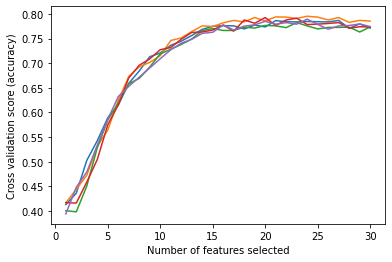

In [12]:
import os
import numpy as np
import pandas as pd
from scipy.signal import stft
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the directory where the segmented data is stored
data_directory = "Alzheimer/SegmentedData"

# Define the classes
classes = ['AD', 'FTD', 'CN']

# Function to preprocess EEG data and extract features
def preprocess_data(data_directory, classes, channel_index):
    X = []
    y = []

    for class_name in classes:
        class_directory = os.path.join(data_directory, class_name)
        segment_files = [file for file in os.listdir(class_directory) if os.path.isfile(os.path.join(class_directory, file))]
        
        for segment_file in segment_files:
            segment_data = np.load(os.path.join(class_directory, segment_file)).T
            
            # Select channel data
            channel_data = segment_data[channel_index]
            
            # Compute STFT
            f, t, Zxx = stft(channel_data, fs=500, nperseg=2500)  # Set nperseg to match segment length
            magnitude = np.abs(Zxx)
            
            # Flatten the magnitude array and append to X
            X.append(magnitude.flatten())
            y.append(class_name)
    
    X = np.array(X)
    y = np.array(y)
    
    return X, y

# Specify the channel index you want to use
channel_index = 2  # Adjust this index according to your requirements

# Preprocess data and extract features
X, y = preprocess_data(data_directory, classes, channel_index)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Apply RFECV to select the optimal features
rfecv = RFECV(estimator=rf_classifier, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

# Plot number of features vs. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


In [14]:
import os
import numpy as np
import cv2
from scipy.signal import stft
from sklearn.model_selection import train_test_split

# Define the directory where the segmented data is stored
data_directory = "Alzheimer/SegmentedData"

# Define the classes
classes = ['AD', 'FTD', 'CN']

# Function to preprocess EEG data and convert segments into STFT-based images
def preprocess_data(data_directory, classes, channel_index, img_size=(64, 64)):
    X = []
    y = []

    for class_name in classes:
        class_directory = os.path.join(data_directory, class_name)
        segment_files = [file for file in os.listdir(class_directory) if os.path.isfile(os.path.join(class_directory, file))]
        
        for segment_file in segment_files:
            segment_data = np.load(os.path.join(class_directory, segment_file)).T
            
            # Select channel data
            channel_data = segment_data[channel_index]
            
            # Compute STFT
            f, t, Zxx = stft(channel_data, fs=250, nperseg=2500)  # Set nperseg to match segment length
            magnitude = np.abs(Zxx)
            
            # Resize STFT magnitude to desired image size
            resized_magnitude = cv2.resize(magnitude, img_size)
            
            # Normalize magnitude values
            max_magnitude = np.max(resized_magnitude)
            if max_magnitude != 0:
                normalized_magnitude = resized_magnitude / max_magnitude
            else:
                normalized_magnitude = resized_magnitude
            
            # Append to X and y
            X.append(normalized_magnitude)
            y.append(class_name)
    
    X = np.array(X)
    y = np.array(y)
    
    return X, y

# Specify the channel index you want to use
channel_index = 0  # Adjust this index according to your requirements

# Preprocess data and convert segments into STFT-based images
X, y = preprocess_data(data_directory, classes, channel_index)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (11259, 64, 64)
y_train shape: (11259,)
X_test shape: (2815, 64, 64)
y_test shape: (2815,)


In [17]:
import os
import numpy as np
import cv2
from scipy.signal import stft
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers, models

# Define the directory where the segmented data is stored
data_directory = "Alzheimer/SegmentedData"

# Define the classes
classes = ['AD', 'FTD', 'CN']

# Function to preprocess EEG data and convert segments into STFT-based images
def preprocess_data(data_directory, classes, channel_index, img_size=(64, 64)):
    X = []
    y = []

    for class_name in classes:
        class_directory = os.path.join(data_directory, class_name)
        segment_files = [file for file in os.listdir(class_directory) if os.path.isfile(os.path.join(class_directory, file))]
        
        for segment_file in segment_files:
            segment_data = np.load(os.path.join(class_directory, segment_file)).T
            
            # Select channel data
            channel_data = segment_data[channel_index]
            
            # Compute STFT
            f, t, Zxx = stft(channel_data, fs=250, nperseg=2500)  # Set nperseg to match segment length
            magnitude = np.abs(Zxx)
            
            # Resize STFT magnitude to desired image size
            resized_magnitude = cv2.resize(magnitude, img_size)
            
            # Normalize magnitude values
            max_magnitude = np.max(resized_magnitude)
            if max_magnitude != 0:
                normalized_magnitude = resized_magnitude / max_magnitude
            else:
                normalized_magnitude = resized_magnitude
            
            # Append to X and y
            X.append(normalized_magnitude)
            y.append(class_name)
    
    X = np.array(X)
    y = np.array(y)
    
    return X, y

# Specify the channel index you want to use
channel_index = 0  # Adjust this index according to your requirements

# Preprocess data and convert segments into STFT-based images
X, y = preprocess_data(data_directory, classes, channel_index)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define CNN architecture
# Define CNN architecture
model = models.Sequential([
    layers.Reshape((64, 64, 1), input_shape=(64, 64)),  # Reshape to include the number of channels
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(classes))
])


# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Apply RFECV to select the optimal features
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rfecv = RFECV(estimator=rf_classifier, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

# Print the optimal number of features
print("Optimal number of features:", rfecv.n_features_)

# Apply feature selection to the training and testing sets
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)

# Train the Random Forest classifier on the selected features
rf_classifier.fit(X_train_selected, y_train)

# Predictions
rf_predictions = rf_classifier.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy:", accuracy)


X_train shape: (11259, 64, 64)
y_train shape: (11259,)
X_test shape: (2815, 64, 64)
y_test shape: (2815,)
Epoch 1/10


UnimplementedError: Graph execution error:

Detected at node 'Cast_31' defined at (most recent call last):
    File "C:\Users\Rajveer\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Rajveer\Anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Rajveer\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\Rajveer\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\Rajveer\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\Rajveer\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Rajveer\Anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\Rajveer\Anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\Rajveer\Anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Rajveer\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\Rajveer\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\Rajveer\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\Rajveer\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\Rajveer\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\Rajveer\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Rajveer\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\Rajveer\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\Rajveer\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Rajveer\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Rajveer\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Rajveer\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Rajveer\AppData\Local\Temp\ipykernel_12408\3604069869.py", line 91, in <cell line: 91>
      history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
    File "C:\Users\Rajveer\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Rajveer\Anaconda3\lib\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Rajveer\Anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "C:\Users\Rajveer\Anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Rajveer\Anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Rajveer\Anaconda3\lib\site-packages\keras\engine\training.py", line 1028, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\Rajveer\Anaconda3\lib\site-packages\keras\engine\training.py", line 1122, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\Rajveer\Anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 605, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "C:\Users\Rajveer\Anaconda3\lib\site-packages\keras\utils\metrics_utils.py", line 77, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "C:\Users\Rajveer\Anaconda3\lib\site-packages\keras\metrics\base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "C:\Users\Rajveer\Anaconda3\lib\site-packages\keras\metrics\base_metric.py", line 676, in update_state
      y_true = tf.cast(y_true, self._dtype)
Node: 'Cast_31'
Cast string to float is not supported
	 [[{{node Cast_31}}]] [Op:__inference_train_function_3054]

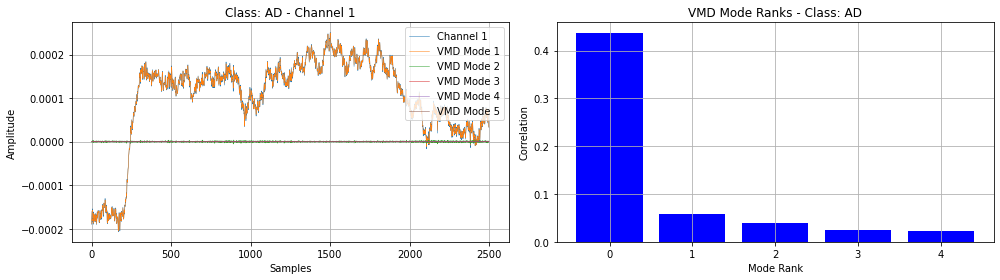

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
from vmdpy import VMD

# Define the directory where the segmented data is stored
data_directory = "Alzheimer/SegmentedData"

# Define the class and channel
class_name = 'AD'
channel_index = 0  # Specify the channel index (0-based)

# Create a new figure
fig, axs = plt.subplots(1, 2, figsize=(14, 4))  # Adjust figure size as needed

# VMD parameters
K_vmd = 5
DC_vmd = 0
init_vmd = 1
tol_vmd = 1e-7
num_modes = 5
alpha = 2000

# Load segment data
class_directory = os.path.join(data_directory, class_name)
segment_files = [file for file in os.listdir(class_directory) if os.path.isfile(os.path.join(class_directory, file))]  # Get all segment files
segment_file = segment_files[0]  # Select the first segment file for visualization
segment_data = np.load(os.path.join(class_directory, segment_file))

# Transpose the segment data to match the correct dimensions
segment_data = segment_data.T

# Split features and class labels
features = segment_data[:, :-1]  # Features
class_labels = segment_data[:, -1]  # Class labels

# Apply VMD to selected channel
vmd = VMD(features[:, channel_index], num_modes, alpha, K_vmd, DC_vmd, init_vmd, tol_vmd)
modes = vmd[0]

# Plot original signal and VMD modes
axs[0].plot(features[:, channel_index], label=f"Channel {channel_index+1}", linewidth=0.5)  # Original signal
for k, mode in enumerate(modes):
    axs[0].plot(mode, label=f"VMD Mode {k+1}", linewidth=0.5)

axs[0].set_title(f"Class: {class_name} - Channel {channel_index+1}")
axs[0].set_xlabel("Samples")
axs[0].set_ylabel("Amplitude")
axs[0].legend(loc="upper right")
axs[0].grid(True)

# Plot the channel ranks
axs[1].bar(np.arange(len(modes)), np.abs(np.corrcoef(modes, class_labels)[:num_modes, -1]), color='blue')
axs[1].set_title(f"VMD Mode Ranks - Class: {class_name}")
axs[1].set_xlabel("Mode Rank")
axs[1].set_ylabel("Correlation")
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the result
plt.show()


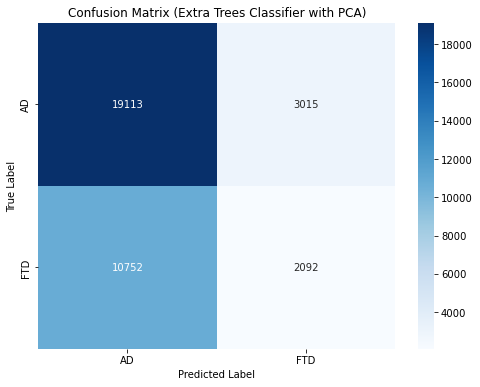

Accuracy of Extra Trees Classifier with PCA: 0.6063422166304472


In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA

# Replace 'your_save_directory' with the actual directory where your segmented data is stored
save_directory = "Alzheimer\\SegmentedData"

# Initialize lists to store features and labels
all_features = []
all_labels = []

# Iterate through each class
classes = ['AD', 'FTD']

for class_label in classes:
    class_directory = os.path.join(save_directory, class_label)

    # Initialize lists to store features and labels for the current class
    class_features = []
    class_labels = []

    # Iterate through each file in the class directory
    for file_name in os.listdir(class_directory):
        # Skip subdirectories
        if os.path.isdir(os.path.join(class_directory, file_name)):
            continue
        
        file_path = os.path.join(class_directory, file_name)
        # Load the data from each file into a NumPy array
        data = np.load(file_path)

        # Append the data and the corresponding label to the lists
        class_features.extend(data)
        class_labels.extend([class_label] * len(data))

    # Append the features and labels of the current class to the overall lists
    all_features.extend(class_features)
    all_labels.extend(class_labels)

# Convert lists to NumPy arrays
all_features = np.array(all_features)
all_labels = np.array(all_labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize the Extra Trees Classifier
clf_et = ExtraTreesClassifier(random_state=42)

# Train the Extra Trees Classifier
clf_et.fit(X_train_pca, y_train)

# Predict the labels for the test set using the Extra Trees Classifier
y_pred_et = clf_et.predict(X_test_pca)

# Generate confusion matrix
conf_matrix_et = confusion_matrix(y_test, y_pred_et)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_et, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix (Extra Trees Classifier with PCA)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("confusion_matrix_et_pca.png", dpi=300)  # Save the confusion matrix as an image with high DPI
plt.show()

# Calculate accuracy
accuracy_et = accuracy_score(y_test, y_pred_et)
print("Accuracy of Extra Trees Classifier with PCA:", accuracy_et)
